### A gyakorlati zh felépítése, kinézete és feladatai hasonlóak lesznek ehhez.  

In [46]:
# imports
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. feladat: 
Töltd be az iris adatbázist az sklearn-ből, és PCA segítségével csökkentsd le 3 dimenzióra.   
Ábrázold az adatokat egy 3D-s grafikonon, ahol az egyes osztályok különböző színnel vannak jelölve. 

In [22]:
data = datasets.load_iris()
X = data.data
Y = data.target

pca = PCA(n_components=3)
X = pca.fit_transform(X)

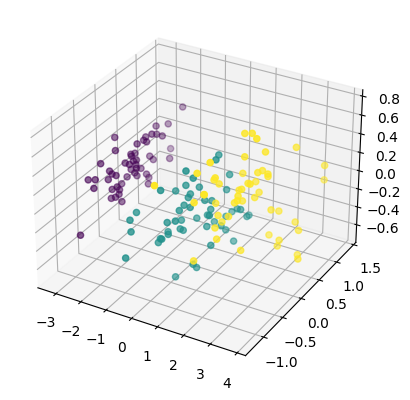

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=X[:,0],ys=X[:,1],zs=X[:,2],c=Y)

# 2. feladat: 
Olvasd be a 'housing.csv' fájlt, és tárold egy pandas dataframe-ben! Ellenőrizd a beolvasást!

In [27]:
df = pd.read_csv("housing.csv",sep=";")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# 3. feladat: 
Csak a longitude, latitude és median_house_value oszlopokat tartasd meg a többi nem fog kelleni!


In [30]:
df = df[["longitude","latitude","median_house_value"]]
df.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


# 4. feladat: 
Nézd meg, hogy vannak e hiányzó értékek! Ha vannak, akkor kezeld le őket valamilyen módon!


In [31]:
df.isnull().sum()

longitude             0
latitude              0
median_house_value    0
dtype: int64

# 5. feladat: 
A longitude és latitude oszlopok segítségével készíts egy plotot amely a házak elhelyezkedését ábrázolja, a pontok színét az ár adja!


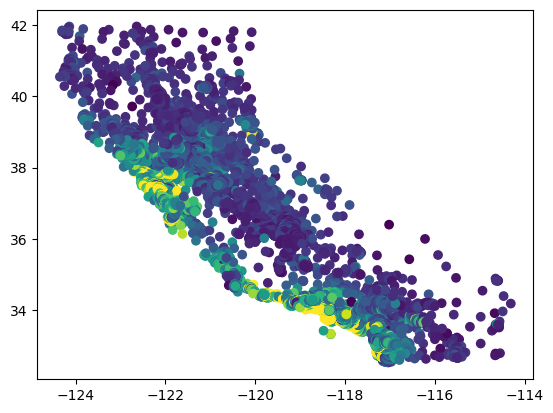

In [34]:
plt.scatter(df["longitude"],df["latitude"],c=df["median_house_value"])

# 6. feladat: 
Normalizáld az adatokat! (StandardScaler, MinMaxScaler)


In [38]:
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

X_standard = standard_scaler.fit_transform(X)
X_minmax = minmax_scaler.fit_transform(X)

# 7. feladat: 
Készíts egy KMeans osztályt 3 clusterrel, és futtasd le a modellt a normalizált adatokon!


In [41]:
model = KMeans(n_clusters=3)
model_standard = model.fit(X_standard,Y)
model_minmax = model.fit(X_minmax,Y)

c:\Users\Márton\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Márton\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 8.feladat: 
Készíts egy plotot, amely a házak elhelyezkedését ábrázolja, a pontok színét a klaszterek adják! (Használd a kmeans.labels_ függvényét!)


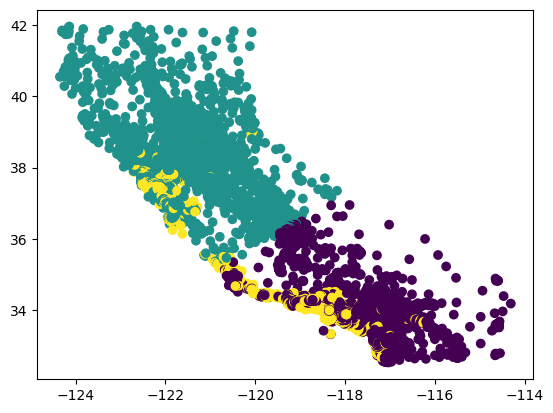

In [44]:
plt.scatter(df["longitude"],df["latitude"],c=model.labels_)

# 9. feladat: 
Számold ki a modell pontosságát a silhouette_score segítségével!


In [48]:
print(f"Standard scaled kmeans model accuracy: {silhouette_score(X_standard,model_standard.labels_)}")
print(f"MinMax scaled kmeans model accuracy: {silhouette_score(X_minmax,model_minmax.labels_)}")

Standard scaled kmeans model accuracy: 0.5273127254629075
MinMax scaled kmeans model accuracy: 0.5267474810197442


# 10. feladat: 
Vizsgáld meg hogy hány clusterrel lehet a legjobb eredményt elérni! (2-8-ig próbálj ki értékeket)  
  
Ne egyesével próbálgasd, hanem egy ciklus segítségével, és tárold el az eredményeket egy listában!

In [50]:
AccuracyList = []
for clusterNum in range(2,9):
    kMeansModel = KMeans(n_clusters=clusterNum).fit(X_standard) 
    AccuracyList.append(silhouette_score(X_standard,kMeansModel.labels_))

for i,ele in enumerate(AccuracyList):
    print(f"Kmeans model accuracy at {i+2} clusters: {ele}")

c:\Users\Márton\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Márton\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Márton\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Márton\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

Kmeans model accuracy at 2 clusters: 0.5412002391404154
Kmeans model accuracy at 3 clusters: 0.5293975798836436
Kmeans model accuracy at 4 clusters: 0.48847787359765293
Kmeans model accuracy at 5 clusters: 0.4682080929140654
Kmeans model accuracy at 6 clusters: 0.4125545077411802
Kmeans model accuracy at 7 clusters: 0.4080333479820108


# 11. feladat: 
Készíts egy plotot, amelyen az egyes k értékekhez tartozó silhouette_score értékeket ábrázolod!


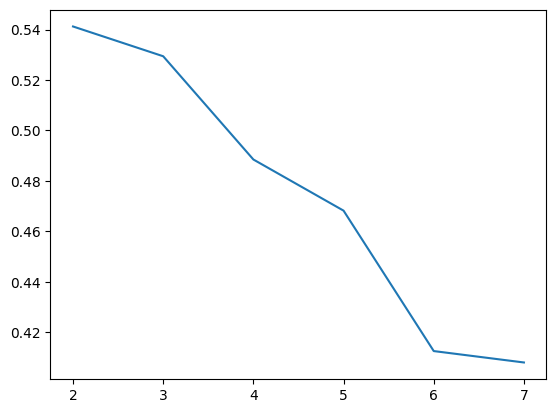

In [51]:
plt.plot([x for x in range(2,8)],AccuracyList)

# 12. feladat: 
Melyik k értékhez tartozik a legnagyobb silhouette_score? Plottold ki a klasztereket a korábbi módon!


c:\Users\Márton\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


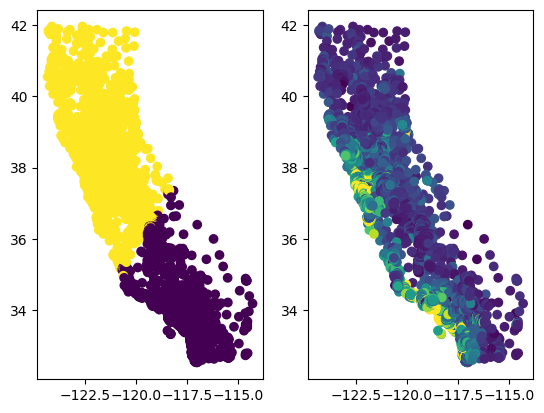

In [59]:
fig,ax = plt.subplots(1,2)

kMeansModel = KMeans(n_clusters=2).fit(X_standard)
ax[0].scatter(df["longitude"],df["latitude"],c=kMeansModel.labels_)
ax[1].scatter(df["longitude"],df["latitude"],c=df["median_house_value"])

# 13. feladat: 
Hasnlítsad össze a plotot azzal ahol a házak árá adta a színt! Néhány mondatban értékeld az eredményt!
